# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Preperation

In [3]:
# Loading the Wine dataset
wine = load_wine()

# Creating a DataFrame
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

In [5]:
print("Wine Dataset Sample: ")
print(data.head())

Wine Dataset Sample: 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline

In [18]:
print("\nUnique Target Classes:", data['target'].unique)


Unique Target Classes: <bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32>


## Standardizing the Data

In [9]:
X = data.drop(columns='target')
y = data['target']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nShape of Scaled Data:",X_scaled.shape)


Shape of Scaled Data: (178, 13)


# PCA Implementation

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
pca_df['target'] = y

print("\nExplained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.36198848 0.1920749 ]


## Visualizing the PCA Results

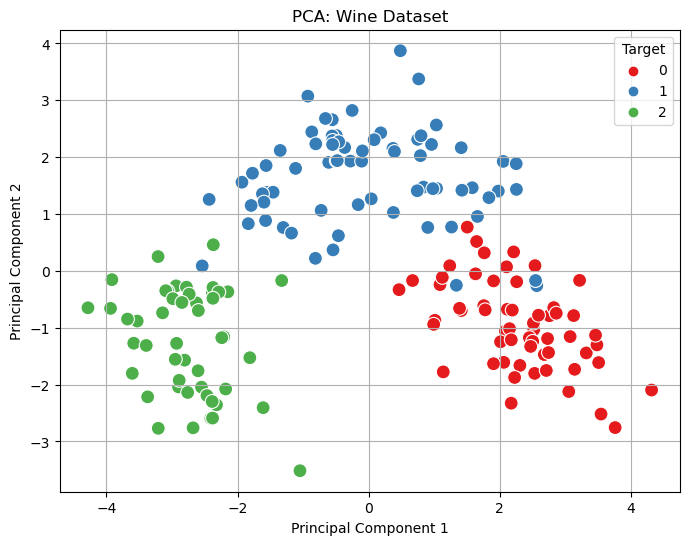

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',hue='target',palette='Set1', s=100)
plt.title('PCA: Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='best')
plt.grid(True)
plt.show()

## Visualizing the Explained Variance

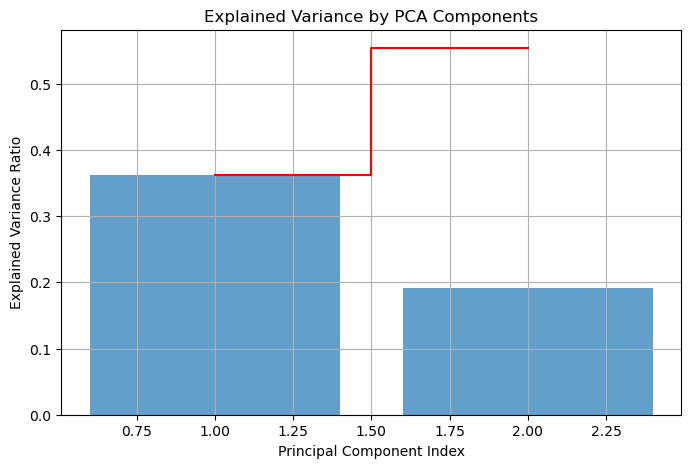

In [23]:
plt.figure(figsize=(8,5))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha = 0.7, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),where='mid', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Interpreting PCA

In [28]:
components = pd.DataFrame(pca.components_,columns=wine.feature_names, index=['PCA1','PCA2'])
print("\nPrincipal Componets: ")
print(components)


Principal Componets: 
       alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PCA1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PCA2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

      total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PCA1       0.394661    0.422934             -0.298533         0.313429   
PCA2      -0.065040    0.003360             -0.028779        -0.039302   

      color_intensity       hue  od280/od315_of_diluted_wines   proline  
PCA1        -0.088617  0.296715                      0.376167  0.286752  
PCA2        -0.529996  0.279235                      0.164496 -0.364903  


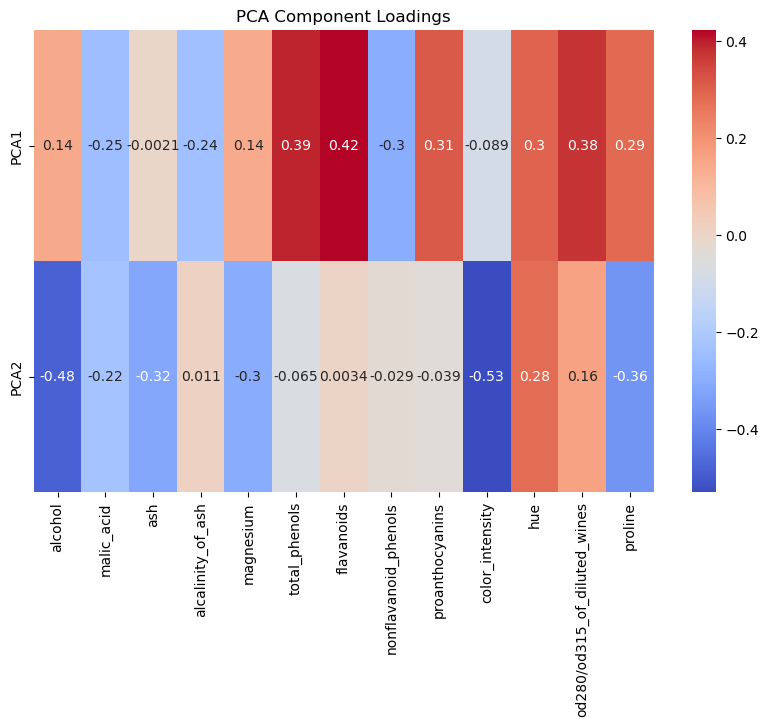

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(components, annot=True, cmap='coolwarm',xticklabels=wine.feature_names, yticklabels=['PCA1','PCA2'])
plt.title('PCA Component Loadings')
plt.show()